In [4]:
%run cifar10_CNN.ipynb

Num GPUs Available:  1


In [5]:
trainX_norm, trainY, testX_norm, testY = load_and_preprocess()

Training Set: X: (50000, 32, 32, 3), y: (50000, 10)
Testing Set: X: (10000, 32, 32, 3), y: (10000, 1)


Training base1 model
Training takes 4.15 minutes
> Testing accuracy - base1: 66.59%
Saving model...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/base1/assets
Model Saved


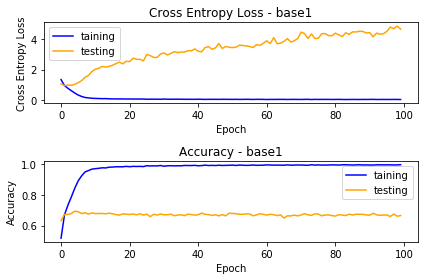

In [3]:
model_base1 = train_and_validate(build_model_base1, trainX_norm, trainY, testX_norm, testY)

In [ ]:
model_base2 = train_and_validate(build_model_base2, trainX_norm, trainY, testX_norm, testY)

In [ ]:
model_base3 = train_and_validate(build_model_base3, trainX_norm, trainY, testX_norm, testY)

Training VGG3_bn model
Training takes 7.018 minutes
> Testing accuracy - VGG3_bn: 82.37%
Saving model...
INFO:tensorflow:Assets written to: models/VGG3_bn/assets
Model Saved


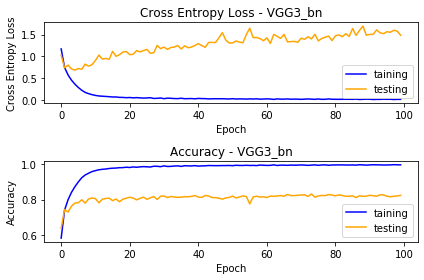

In [4]:
model_VGG3_bn = train_and_validate(build_model_VGG3_bn, trainX_norm, trainY, testX_norm, testY)

Training VGG3_l2 model
Training takes 6.487 minutes
> Testing accuracy - VGG3_l2: 75.56%
Saving model...
INFO:tensorflow:Assets written to: models/VGG3_l2/assets
Model Saved


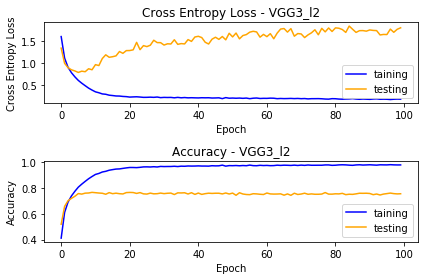

In [5]:
model_VGG3_l2 = train_and_validate(build_model_VGG3_l2, trainX_norm, trainY, testX_norm, testY)

Training VGG3_dropout model
Training takes 6.562 minutes
> Testing accuracy - VGG3_dropout: 79.03999999999999%
Saving model...
INFO:tensorflow:Assets written to: models/VGG3_dropout/assets
Model Saved


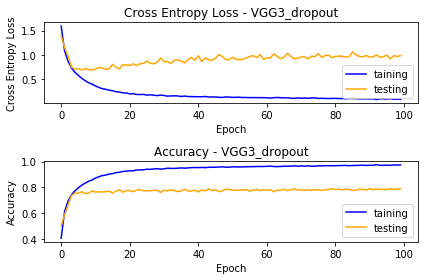

In [6]:
model_VGG3_droout = train_and_validate(build_model_VGG3_dropout, trainX_norm, trainY, testX_norm, testY)

Training augmented_base3 model
Training takes 41.401 minutes
> Testing accuracy - augmented_base3: 84.69%
Saving model...
Model Saved


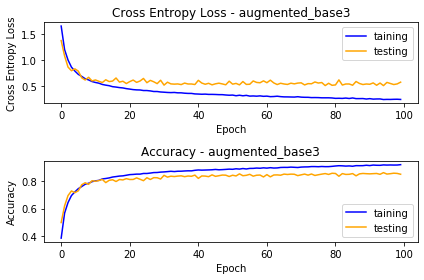

In [3]:
model_augmented_VGG3 = train_and_validate_augmented(build_model_base3, trainX_norm, trainY, testX_norm, testY)

Training augmented_VGG3_final model
Training takes 42.242 minutes
> Testing accuracy - augmented_VGG3_final: 82.6%
Saving model...
Model Saved


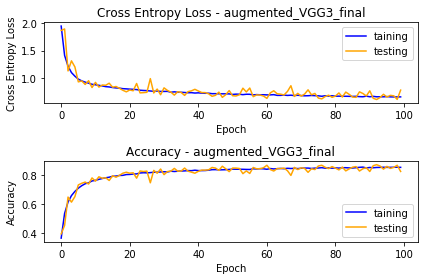

In [6]:
final_model = train_and_validate_augmented(build_model_VGG3_final, trainX_norm, trainY, testX_norm, testY)